# Проект: вариант 2
## Задание 1. A/B–тестирование
### 1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

### 1.2 Входные данные

В качестве входных данных Вы имеете 4 csv-файла:

groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 

groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных

active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 

checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 
### 1.3 Вопросы

Предлагаем Вам ответить на следующие вопросы:

На какие метрики Вы смотрите в ходе анализа и почему?
Имеются ли различия в показателях и с чем они могут быть связаны?
Являются ли эти различия статистически значимыми?
Стоит ли запускать новую механику на всех пользователей?
Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

### 1.4 Требования к ответу

При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [2]:
df_groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/project_24.07.23/Проект_2_groups.csv', sep = ';')
df_group_add = pd.DataFrame(columns=["Column1", "Column2"])
df_active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/project_24.07.23/Проект_2_active_studs.csv', sep = ',')
df_checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/project_24.07.23/Проект_2_checks.csv', sep = ';')

# Мини-блок по задаче 3.1

#### Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [3]:
import os

def append_csv_files_data_to_dataframe(folder_path, dataframe):
    """
    Ищет все файлы с расширением '.csv' в указанной папке и добавляет данные из каждого файла в датафрейм.

    Параметры:
    folder_path (str): Путь к папке, где необходимо искать файлы.
    dataframe (pd.DataFrame): Датафрейм, куда будут добавлены данные из файлов.

    Возвращает:
    pd.DataFrame: Датафрейм с добавленными данными из всех найденных файлов CSV.
    """
    files = os.listdir(folder_path)  # Получаем список всех файлов в указанной папке
    csv_files = [file for file in files if file.endswith(".csv")]  # Отбираем только файлы с расширением '.csv'
    
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        try:
            data_to_append = pd.read_csv(file_path)  # Чтение данных из CSV-файла
            dataframe = dataframe.append(data_to_append, ignore_index=True)
            print(f"Данные из файла '{csv_file}' успешно добавлены в датафрейм.")
        except Exception as e:
            print(f"Ошибка при чтении файла '{csv_file}': {e}")
    
    return dataframe

# Пример использования функции:
#if __name__ == "__main__":
    # Создаем пустой датафрейм
    #df = pd.DataFrame(columns=["Column1", "Column2"])

    # Путь к папке с файлами (можно изменить в соответствии с вашими данными)
    #folder_path = "путь/к/папке"

    # Вызываем функцию и передаем ей путь к папке и датафрейм
    #df = append_csv_files_data_to_dataframe(folder_path, df)


In [4]:
folder_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/project_24.07.23/folder_with_additional_files/'

In [5]:
df_group_add = append_csv_files_data_to_dataframe(folder_path, df_group_add)

Данные из файла 'Проект_2_group_add.csv' успешно добавлены в датафрейм.


#### анализ df_groups

In [6]:
df_groups.shape

(74484, 2)

In [7]:
df_groups.dtypes

id      int64
grp    object
dtype: object

In [8]:
df_groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [9]:
df_groups.describe()

,id
count,7.448400e+04
mean,2.133752e+06
std,1.531423e+06
min,1.489000e+03
25%,9.174980e+05
50%,1.667190e+06
75%,3.322955e+06
max,5.694419e+06


In [10]:
df_groups.nunique()

id     74484
grp        2
dtype: int64

In [11]:
df_groups.isna().sum()

id     0
grp    0
dtype: int64

#### анализ df_group_add

In [12]:
df_group_add.shape

(92, 4)

In [13]:
df_group_add.dtypes

Column1     object
Column2     object
id         float64
grp         object
dtype: object

In [14]:
df_group_add.head()

,Column1,Column2,id,grp
0,NaN,NaN,5694584.0,B
1,NaN,NaN,5694830.0,B
2,NaN,NaN,5695057.0,B
3,NaN,NaN,5698872.0,B
4,NaN,NaN,5699067.0,B


In [15]:
df_group_add.describe()

,id
count,9.200000e+01
mean,2.796406e+07
std,6.141605e+07
min,5.694584e+06
25%,5.712349e+06
50%,5.729634e+06
75%,5.825646e+06
max,2.010677e+08


In [16]:
df_group_add.nunique()

Column1     0
Column2     0
id         92
grp         2
dtype: int64

In [17]:
df_group_add.isna().sum()

Column1    92
Column2    92
id          0
grp         0
dtype: int64

#### анализ df_active_studs

In [18]:
df_active_studs.shape

(8341, 1)

In [19]:
df_active_studs.dtypes

student_id    int64
dtype: object

In [20]:
df_active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [21]:
df_active_studs.describe()

,student_id
count,8.341000e+03
mean,2.448547e+06
std,1.564978e+06
min,1.627000e+03
25%,1.118405e+06
50%,2.094192e+06
75%,3.638877e+06
max,5.951797e+06


In [22]:
df_active_studs.nunique()

student_id    8341
dtype: int64

In [23]:
df_active_studs.isna().sum()

student_id    0
dtype: int64

#### анализ df_checks

In [24]:
df_checks.shape

(541, 2)

In [25]:
df_checks.dtypes

student_id      int64
rev           float64
dtype: object

In [26]:
df_checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [27]:
df_checks.describe()

,student_id,rev
count,5.410000e+02,541.000000
mean,2.514772e+06,1059.752317
std,1.726839e+06,762.712359
min,1.627000e+03,199.000000
25%,9.871290e+05,290.000000
50%,2.526021e+06,840.000000
75%,3.993249e+06,1900.000000
max,5.740903e+06,4650.000000


In [28]:
df_checks.nunique()

student_id    541
rev            39
dtype: int64

In [29]:
df_checks.isna().sum()

student_id    0
rev           0
dtype: int64

#### Выводы по анализу таблиц:
1. Нет пустых значений
2. В каждой таблице значения являются уникальными, т.е. кол-во строк = кол-ву уникальных пользователей


#### Соденим присланные через 2 дня данные с основными

In [30]:
df_groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [31]:
df_group_add.head()

,Column1,Column2,id,grp
0,NaN,NaN,5694584.0,B
1,NaN,NaN,5694830.0,B
2,NaN,NaN,5695057.0,B
3,NaN,NaN,5698872.0,B
4,NaN,NaN,5699067.0,B


In [32]:
df_all_id = pd.concat([df_groups, df_group_add]) # передаем наши датафреймы, как элементы списка (т.е. используем []) и получаем общий df

In [33]:
df_all_id.head()

,id,grp,Column1,Column2
0,1489.0,B,NaN,NaN
1,1627.0,A,NaN,NaN
2,1768.0,B,NaN,NaN
3,1783.0,B,NaN,NaN
4,1794.0,A,NaN,NaN


In [34]:
df_all_id.shape

(74576, 4)

In [35]:
# проверим на уникальность

In [36]:
df_groups.shape[0] + df_group_add.shape[0] # кол-во строк совпадает, если бы мы просто сложили все строки 1 и 2 датафреймов

74576

#### Соединим данные в одну таблицу

In [37]:
# проверим, что все пользователи, которые совершили оплату в дни теста df_checks, являются частью группы active_studs.csv, которая зашла на платформу в дни проведения теста

In [38]:
merged_check = pd.merge(df_active_studs, df_checks, on='student_id', how = 'left')

In [39]:
merged_check.count()

student_id    8341
rev            392
dtype: int64

мы увидели, что не все пользователи, которые что-то купили, зашли на платформу в дни теста. Делаем вывод: 

1. Дествия "зайти на платформу" и "провести оплату" не являются созависимыми (не знаю, что означает "со-", но мне кажется очень подходит и грамотнее звучит). 

2. Ошибка в описании файлов задания (имеет место быть)

Мы пойдем по первому пути

active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 

checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

In [40]:
# соединим все id с таблицей по входам, затем получившуюся талицу соединим с таблицей по покупкам
merged_df = pd.merge(df_all_id, df_active_studs, left_on='id', right_on='student_id', how = 'left')

In [41]:
merged_df.count()

id            74576
grp           74576
Column1           0
Column2           0
student_id     8341
dtype: int64

In [42]:
df = pd.merge(merged_df, df_checks, left_on='id', right_on='student_id', how = 'left')

In [43]:
df.head()

,id,grp,Column1,Column2,student_id_x,student_id_y,rev
0,1489.0,B,NaN,NaN,NaN,NaN,NaN
1,1627.0,A,NaN,NaN,1627.0,1627.0,990.0
2,1768.0,B,NaN,NaN,NaN,NaN,NaN
3,1783.0,B,NaN,NaN,NaN,NaN,NaN
4,1794.0,A,NaN,NaN,NaN,NaN,NaN


In [44]:
df.count() # проверка показывает, что нет лишних значений

id              74576
grp             74576
Column1             0
Column2             0
student_id_x     8341
student_id_y      541
rev               541
dtype: int64

In [45]:
# удалим дублирующийся столбец student_id_y, который повторяет столбец id
df = df.drop(['student_id_y'], axis=1)
df.head()

,id,grp,Column1,Column2,student_id_x,rev
0,1489.0,B,NaN,NaN,NaN,NaN
1,1627.0,A,NaN,NaN,1627.0,990.0
2,1768.0,B,NaN,NaN,NaN,NaN
3,1783.0,B,NaN,NaN,NaN,NaN
4,1794.0,A,NaN,NaN,NaN,NaN


In [46]:
# переименуем столбцы
df.rename(columns={'student_id_x': 'zahodil'}, inplace=True)

In [47]:
df.count()

id         74576
grp        74576
Column1        0
Column2        0
zahodil     8341
rev          541
dtype: int64

In [48]:
# количество строк не изменилось

1.3 Вопросы
Предлагаем Вам ответить на следующие вопросы:

На какие метрики Вы смотрите в ходе анализа и почему? Имеются ли различия в показателях и с чем они могут быть связаны? Являются ли эти различия статистически значимыми? Стоит ли запускать новую механику на всех пользователей? Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

In [49]:
# Перед тем как считать всякое, хочу посмотреть насколько равны группы
df_count_of_users = df.groupby('grp', as_index = False).agg(members = ('grp','count'))

In [50]:
df_count_of_users # видим, что в группе "В" в 4 раза больше участников

,grp,members
0,A,14693
1,B,59883


In [51]:
# выделим распределения в контрольной и тестовой группах

In [52]:
df.head()

,id,grp,Column1,Column2,zahodil,rev
0,1489.0,B,NaN,NaN,NaN,NaN
1,1627.0,A,NaN,NaN,1627.0,990.0
2,1768.0,B,NaN,NaN,NaN,NaN
3,1783.0,B,NaN,NaN,NaN,NaN
4,1794.0,A,NaN,NaN,NaN,NaN


In [53]:
df_control_rev = df.dropna(subset=['rev']).query('grp == "A"').groupby('id').agg({'rev':'sum'})

In [54]:
df_control_rev

,rev
id,
1627.0,990.0
114366.0,690.0
212994.0,690.0
218393.0,690.0
225541.0,690.0
...,...
5394575.0,990.0
5545563.0,1160.0
5557468.0,290.0


In [55]:
df_test_rev = df.dropna(subset=['rev']).query('grp == "B"').groupby('id').agg({'rev':'sum'})

In [56]:
df_test_rev

,rev
id,
3185.0,690.0
25973.0,690.0
26280.0,690.0
100300.0,990.0
100645.0,630.0
...,...
5645737.0,1900.0
5651566.0,1900.0
5662322.0,1900.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff626375390>]],
      dtype=object)

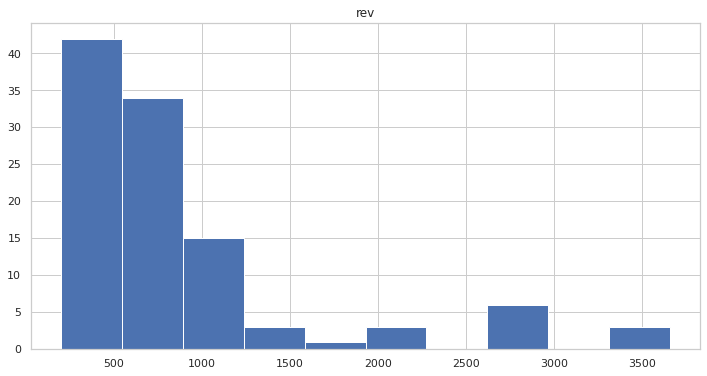

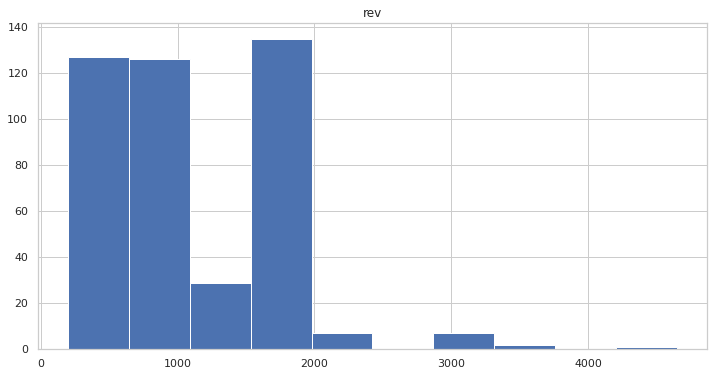

In [57]:
df_control_rev.hist()
df_test_rev.hist()

In [58]:
# Теперь давайте изучим наши распределения. 
# Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле

In [59]:
ss.normaltest(df_control_rev.rev)

NormaltestResult(statistic=52.21845240353401, pvalue=4.580439316510776e-12)

In [60]:
np.std(df_control_rev.rev)

812.071908898108

In [61]:
ss.normaltest(df_test_rev.rev)

NormaltestResult(statistic=33.19587456725772, pvalue=6.18881394639434e-08)

In [62]:
np.std(df_test_rev.rev)

740.9791634782982

In [63]:
# т.к. p-value меньше 0,05, и судя по графикам, можем считать, что расприделения ненормальны

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff623ca7198>,
      dtype=object)

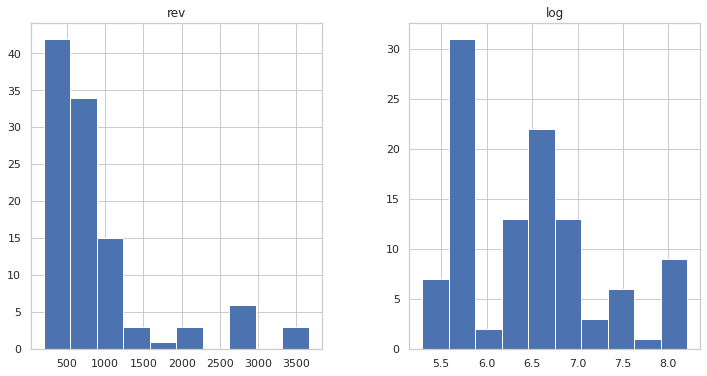

In [64]:
# пробуем прологарифмировать

df_control_rev['log'] = df_control_rev['rev'].apply(lambda x: np.log(x))
df_control_rev.hist()

In [65]:
ss.normaltest(df_control_rev.log)

NormaltestResult(statistic=6.233410724754571, pvalue=0.044302890206508495)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff623baeb70>,
      dtype=object)

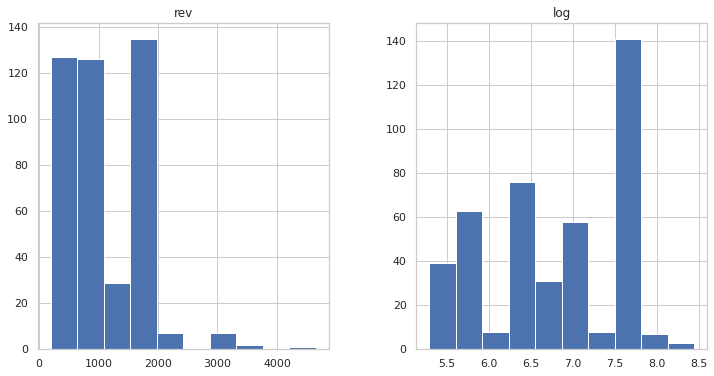

In [66]:
df_test_rev['log'] = df_test_rev['rev'].apply(lambda x: np.log(x))
df_test_rev.hist()

In [67]:
ss.normaltest(df_test_rev.log)

NormaltestResult(statistic=121.52506435050901, pvalue=4.0847696422045564e-27)

In [68]:
# интереснее, но т.к. p-value одной из выборок в логорифмированном состоянии меньше 0,05, и судя по графикам, можем считать, что расприделения ненормальны

### Промежуточный вывод:
    - ненормальные распределения
    - выборки независимы
    - переменная непрерывная

Проверим медианы по нашим выборкам и определим значимо ли отличаются данные

In [69]:
#сюда мы будем складывать результаты
medians = []

#повторяем процесс 10000 раз
for i in range(10000):
    #симулируем выборку
    sample_data_control = df_control_rev.sample(frac=1, replace=True)
    #считаем показатель - в данном случае медиану
    sample_median_control = sample_data_control.rev.median()

    #симулируем выборку
    sample_data_test = df_test_rev.sample(frac=1, replace=True)
    #считаем показатель - в данном случае медиану
    sample_median_test = sample_data_test.rev.median()
    
    medians_diff = sample_median_control - sample_median_test
    #добавляем результат в список
    medians.append(medians_diff)


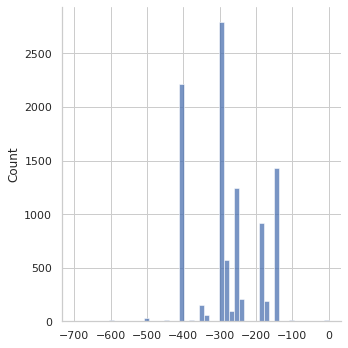

In [70]:
sns.displot(medians)

In [71]:
pd.Series(medians).quantile(0.025)


-410.0

In [72]:
pd.Series(medians).quantile(0.975)

-150.0

In [73]:
# делаем вывод, что оплата значимо изменилась, т.к. доверительный интервал разницы медиан не включает в себя 0

In [74]:
# проделаем тоже самое по колонке заходил юзер или нет на платформу

In [75]:
df.head()

,id,grp,Column1,Column2,zahodil,rev
0,1489.0,B,NaN,NaN,NaN,NaN
1,1627.0,A,NaN,NaN,1627.0,990.0
2,1768.0,B,NaN,NaN,NaN,NaN
3,1783.0,B,NaN,NaN,NaN,NaN
4,1794.0,A,NaN,NaN,NaN,NaN


In [76]:
df['zahodil_0_1'] = df['zahodil'].apply(lambda x: 1 if pd.notna(x) else 0)
df['group'] = df['grp'].apply(lambda x: 0 if x == 'A' else 1)

In [77]:
df.head()

,id,grp,Column1,Column2,zahodil,rev,zahodil_0_1,group
0,1489.0,B,NaN,NaN,NaN,NaN,0,1
1,1627.0,A,NaN,NaN,1627.0,990.0,1,0
2,1768.0,B,NaN,NaN,NaN,NaN,0,1
3,1783.0,B,NaN,NaN,NaN,NaN,0,1
4,1794.0,A,NaN,NaN,NaN,NaN,0,0


In [78]:
# Переменная конверсионная используем метод ХИ-квадрат

In [79]:
from scipy.stats import chi2_contingency

In [80]:
cross_table = pd.crosstab(df.group, df.zahodil_0_1)

In [81]:
cross_table

zahodil_0_1,0,1
group,,
0,13155,1538
1,53080,6803


In [82]:
# Применение хи-квадрат теста
chi2, p_value, dof, expected = chi2_contingency(cross_table)

# Вывод значения
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 9.379874783746445
P-value: 0.0021938053670205165
Degrees of freedom: 1
Expected frequencies: [[13049.65209987  1643.34790013]
 [53185.34790013  6697.65209987]]


In [83]:
# p-value меньше 0,05, значит различия значимы

Посчитаем % входов относительного всего числа входов в тесте и контроле. 
И определим насколько по модулю отличаются эти группы

In [84]:
df.query('group == 0 and zahodil_0_1 == 1').count() * 100 / df.query('group == 0').count() 

id              10.467570
grp             10.467570
Column1               NaN
Column2               NaN
zahodil        100.000000
rev             72.897196
zahodil_0_1     10.467570
group           10.467570
dtype: float64

In [85]:
df.query('group == 1 and zahodil_0_1 == 1').count() * 100 / df.query('group == 1').count() 

id              11.360486
grp             11.360486
Column1               NaN
Column2               NaN
zahodil        100.000000
rev             72.350230
zahodil_0_1     11.360486
group           11.360486
dtype: float64

In [86]:
11.360486-10.467570 # Абсолютное изменение в %

0.8929159999999996

In [87]:
(11.360486-10.467570) / 10.467570 * 100 # Относительное изменение

8.530308371474941

In [88]:
# Количество входов на платформу значимо увеличилось на 8,5 %

У нас все значимо поизменялось. Теперь приступим к метрикам
### I. ARPPU (Average revenue per paying user, средний доход на клиента))

#### рассчитаем повторные покупки 

In [89]:
# А.1 графики распределения

In [90]:
df_count_of_purchases = df.groupby('grp', as_index = False).agg(count_of_purchases = ('rev','count'))
df_sum_of_purchases = df.groupby('grp', as_index = False).agg({'rev':'sum'})

In [91]:
df_count_of_purchases

,grp,count_of_purchases
0,A,107
1,B,434


In [92]:
df_sum_of_purchases

,grp,rev
0,A,92096.0000
1,B,481230.0036


In [93]:
# объединим таблицы и посчитаем отношение числа покупок к числу пользователей
df_ARPPU = df_count_of_users.merge(df_count_of_purchases, on = 'grp', how = 'left')


In [94]:
df_ARPPU = df_ARPPU.merge(df_sum_of_purchases, on = 'grp', how = 'left')

In [95]:
df_ARPPU

,grp,members,count_of_purchases,rev
0,A,14693,107,92096.0000
1,B,59883,434,481230.0036


In [96]:
df_ARPPU['avg_sum_of_purcheses'] = df_ARPPU['rev']/df_ARPPU['count_of_purchases']
df_ARPPU['ARPPU'] = 1*df_ARPPU['avg_sum_of_purcheses'] # т.к. каждый клиент совершил лишь одну покупку, то их кол-во равно кол-ву покупок, а значит число повторных покупок равно 1

In [97]:
df_ARPPU

,grp,members,count_of_purchases,rev,avg_sum_of_purcheses,ARPPU
0,A,14693,107,92096.0000,860.710280,860.710280
1,B,59883,434,481230.0036,1108.824893,1108.824893


In [98]:
# т.о. ARPPU = среднему чеку. Тоже ментрика почему бы и нет

In [99]:
df_ARPPU.at[1, 'ARPPU'] - df_ARPPU.at[0, 'ARPPU']

248.11461271372616

In [100]:
df_ARPPU.at[1, 'ARPPU']*100/df_ARPPU.at[0, 'ARPPU']

128.82672815363173

### Вывод I.1 средний чек вырос на 29% (248 у.е.) в тестовой группе

### ARPU (Average Revenue per User, Средний доход на привлеченного пользователя)

пользователь после оплаты становится клиентом

In [101]:
df_ARPPU['CR'] = df_ARPPU['count_of_purchases']/df_ARPPU['members'] # число клиентов (= числу покупок) на число пользователей

In [102]:
df_ARPPU['ARPU'] = df_ARPPU['ARPPU']*df_ARPPU['CR']

In [103]:
df_ARPPU

,grp,members,count_of_purchases,rev,avg_sum_of_purcheses,ARPPU,CR,ARPU
0,A,14693,107,92096.0000,860.710280,860.710280,0.007282,6.268019
1,B,59883,434,481230.0036,1108.824893,1108.824893,0.007247,8.036171


In [104]:
df_ARPPU.at[1, 'ARPU'] - df_ARPPU.at[0, 'ARPU']

1.768151808200498

In [105]:
df_ARPPU.at[1, 'ARPU']*100/df_ARPPU.at[0, 'ARPU']

128.20910193481794

In [106]:
df_ARPPU.at[1, 'CR'] - df_ARPPU.at[0, 'CR']

-3.491347250076087e-05

In [107]:
df_ARPPU.at[1, 'CR']*100/df_ARPPU.at[0, 'CR']

99.52057602667881

### Вывод I.2 Средний доход на привлеченного пользователя (ARPU) вырос на 28% в тестовой группе, при этом конверсия уменьшилась на 0,5 %

In [108]:
# сравним конверсию в покупку для тех, кто зашел на платформу и купил, и тех кто купил сразу. Общая конверсия у нас хранится в колонке CR

In [109]:
df_count_of_purchases_from_platform = df.query('zahodil > 0').groupby('grp', as_index = False).agg(count_of_purchases_from_platform = ('rev','count'))
df_count_of_purchases_not_platform = df.query('zahodil == "NaN"').groupby('grp', as_index = False).agg(count_of_purchases_not_platform = ('rev','count'))

In [110]:
df_count_of_purchases_from_platform 

,grp,count_of_purchases_from_platform
0,A,78
1,B,314


In [111]:
df_count_of_purchases_not_platform

,grp,count_of_purchases_not_platform
0,A,29
1,B,120


In [112]:
# объединим таблицы 
df_CR = df_count_of_purchases_from_platform.merge(df_count_of_purchases_not_platform, on = 'grp', how = 'left')

In [113]:
df_CR = df_ARPPU.merge(df_CR, on = 'grp', how = 'left')

In [114]:
df_CR

,grp,members,count_of_purchases,rev,avg_sum_of_purcheses,ARPPU,CR,ARPU,count_of_purchases_from_platform,count_of_purchases_not_platform
0,A,14693,107,92096.0000,860.710280,860.710280,0.007282,6.268019,78,29
1,B,59883,434,481230.0036,1108.824893,1108.824893,0.007247,8.036171,314,120


In [115]:
df_CR['CR_from_platform'] = df_CR['count_of_purchases_from_platform']/df_CR['members']
df_CR['CR_not_platform'] = df_CR['count_of_purchases_not_platform']/df_CR['members']
df_CR['CR_not_pltform/platform'] = df_CR['count_of_purchases_not_platform']/df_CR['count_of_purchases_from_platform']

In [116]:
df_CR

,grp,members,count_of_purchases,rev,avg_sum_of_purcheses,ARPPU,CR,ARPU,count_of_purchases_from_platform,count_of_purchases_not_platform,CR_from_platform,CR_not_platform,CR_not_pltform/platform
0,A,14693,107,92096.0000,860.710280,860.710280,0.007282,6.268019,78,29,0.005309,0.001974,0.371795
1,B,59883,434,481230.0036,1108.824893,1108.824893,0.007247,8.036171,314,120,0.005244,0.002004,0.382166


In [117]:
df_CR.at[1, 'CR_from_platform']*100/df_CR.at[0, 'CR_from_platform']

98.77384832046421

In [118]:
df_CR.at[1, 'CR_not_platform']*100/df_CR.at[0, 'CR_not_platform']

101.52901606408359

### I.3 В результате теста незначильно изменилась конверсия, количество клиентов приобретающих продукт с платформы уменьшилось, а кол-во клиентов приобретающих продукт напрямую увеличилось. Общая конверсия при этом уменьшилась.

In [119]:
# хочу посмотреть на средний чек пользователей с платформы и с прямых продаж

In [120]:
df_count_of_purchases_paltform = df.groupby(['grp', 'zahodil_0_1'], as_index = False).agg(count_of_purchases = ('rev','count'))
df_sum_of_purchases_paltform = df.groupby(['grp', 'zahodil_0_1'], as_index = False).agg(sum_of_purchases = ('rev','sum'))

In [121]:
df_count_of_purchases_paltform 

,grp,zahodil_0_1,count_of_purchases
0,A,0,29
1,A,1,78
2,B,0,120
3,B,1,314


In [122]:
df_sum_of_purchases_paltform

,grp,zahodil_0_1,sum_of_purchases
0,A,0,19276.0000
1,A,1,72820.0000
2,B,0,86256.0001
3,B,1,394974.0035


In [123]:
# объединим таблицы и посчитаем отношение числа покупок к числу пользователей
df_ARPPU_platform = pd.merge(df_count_of_purchases_paltform, df_sum_of_purchases_paltform, on = ['grp', 'zahodil_0_1'], how = 'left')

In [124]:
df_ARPPU_platform

,grp,zahodil_0_1,count_of_purchases,sum_of_purchases
0,A,0,29,19276.0000
1,A,1,78,72820.0000
2,B,0,120,86256.0001
3,B,1,314,394974.0035


In [125]:
df_ARPPU_platform['avg_sum_of_purcheses'] = df_ARPPU_platform['sum_of_purchases']/df_ARPPU_platform['count_of_purchases']
df_ARPPU_platform['ARPPU'] = 1*df_ARPPU_platform['avg_sum_of_purcheses'] # т.к. каждый клиент совершил лишь одну покупку, то их кол-во равно кол-ву покупок, а значит число повторных покупок равно 1

In [126]:
df_ARPPU_platform

,grp,zahodil_0_1,count_of_purchases,sum_of_purchases,avg_sum_of_purcheses,ARPPU
0,A,0,29,19276.0000,664.689655,664.689655
1,A,1,78,72820.0000,933.589744,933.589744
2,B,0,120,86256.0001,718.800001,718.800001
3,B,1,314,394974.0035,1257.878992,1257.878992


In [127]:
df_ARPPU_platform.at[2, 'ARPPU'] - df_ARPPU_platform.at[0, 'ARPPU']

54.110345660919506

In [128]:
df_ARPPU_platform.at[3, 'ARPPU'] - df_ARPPU_platform.at[1, 'ARPPU']

324.28924844847336

In [129]:
df_ARPPU_platform.at[2, 'ARPPU']*100/df_ARPPU_platform.at[0, 'ARPPU']

108.14069321522445

In [130]:
df_ARPPU_platform.at[3, 'ARPPU']*100/df_ARPPU_platform.at[1, 'ARPPU']

134.73573383545857

### Вывод I.4 из данных видим, что средний чек для покупателей с платформы вырос на 35%, для покупателей напрямую на 8%

# Резюме по разделу 1:
    Оплата значимо увеличилась, вход на платформу значимо уменьшился
    
    1 Средний доход на клиента (ARPPU) вырос на 29% (248 у.е.) в тестовой группе
    2 Средний доход на привлеченного пользователя (ARPU) вырос на 28% в тестовой группе
    3 В результате теста изменилась конверсия: количество клиентов, приобретающих продукт с платформы уменьшилось (при том, что кол-во входов на платформу значимо увеличилось), а кол-во клиентов, приобретающих продукт напрямую увеличилось. Общая конверсия при этом уменьшилась.
    4 Средний доход для покупателей с платформы вырос на 35%, для покупателей напрямую на 8%
    
### Новую механику стоит распространять на всех пользователей. Начинать следует с тех, кто покупает продукт с платформы

# Мини-блок по задаче 3.2

#### Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [131]:
def plot_metrics(metrics_df):
    # Проверяем, есть ли данные для построения графиков
    if metrics_df is None or metrics_df.empty:
        print("Нет данных для построения графиков.")
        return

    # Получаем список всех столбцов с метриками, кроме столбца с индексом
    metric_columns = metrics_df.columns.tolist()

    # Строим графики для каждой метрики
    for column in metric_columns:
        if column != metrics_df.index.name:  # Игнорируем индексный столбец
            plt.figure(figsize=(8, 6))
            plt.bar(metrics_df.grp, metrics_df[column])
            plt.xlabel(metrics_df.index.name)
            plt.ylabel(column)
            plt.title(f"График метрики '{column}'")
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()
            
# Пример использования функции
#data = {'group': ['A', 'B', 'A', 'B', 'A'],
        #'some_metric': [10, 15, 5, 20, 25],
        #'other_metric': [2.5, 3.0, 1.0, 4.0, 2.0]}
#df_metrics = pd.DataFrame(data).groupby('group').agg({'some_metric': 'sum', 'other_metric': 'mean'})
#plot_metrics(df_metrics)

In [132]:
df_CR

,grp,members,count_of_purchases,rev,avg_sum_of_purcheses,ARPPU,CR,ARPU,count_of_purchases_from_platform,count_of_purchases_not_platform,CR_from_platform,CR_not_platform,CR_not_pltform/platform
0,A,14693,107,92096.0000,860.710280,860.710280,0.007282,6.268019,78,29,0.005309,0.001974,0.371795
1,B,59883,434,481230.0036,1108.824893,1108.824893,0.007247,8.036171,314,120,0.005244,0.002004,0.382166


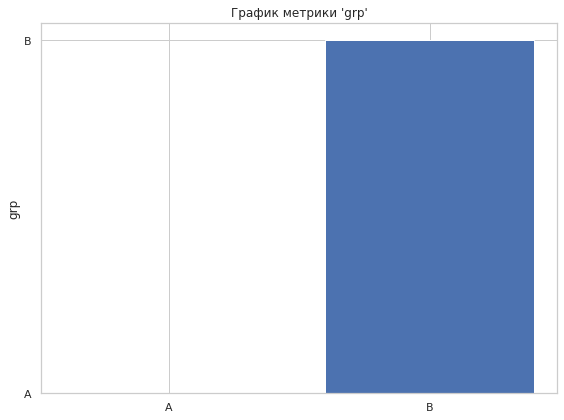

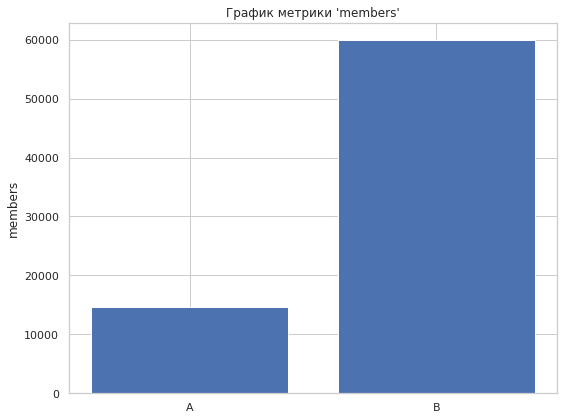

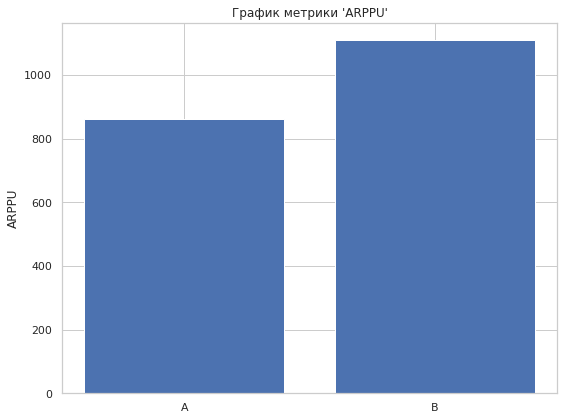

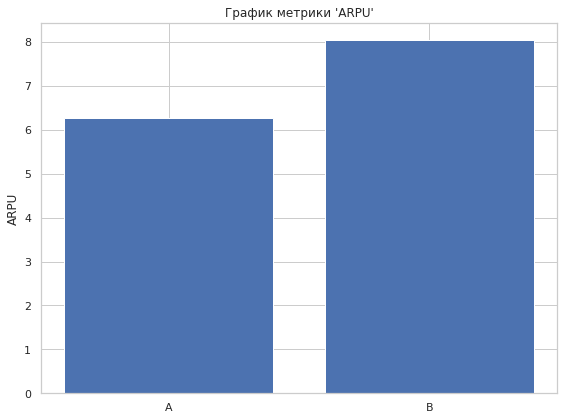

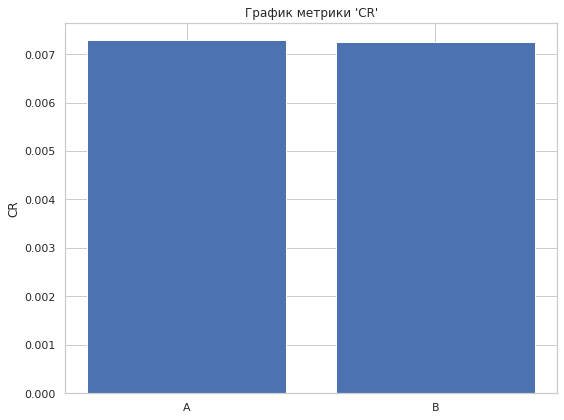

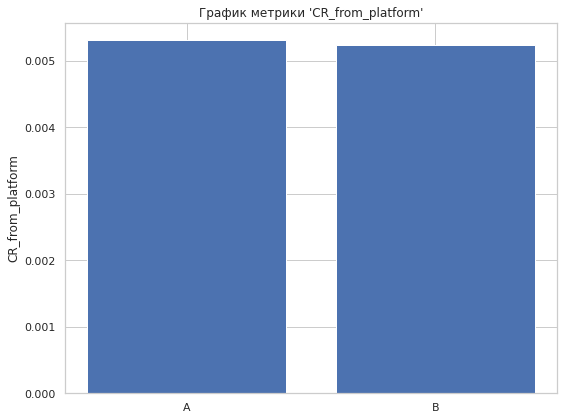

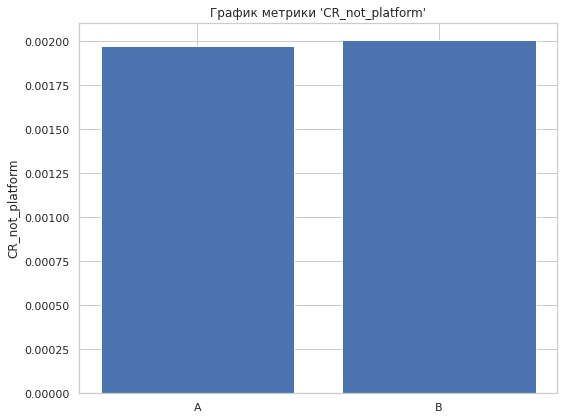

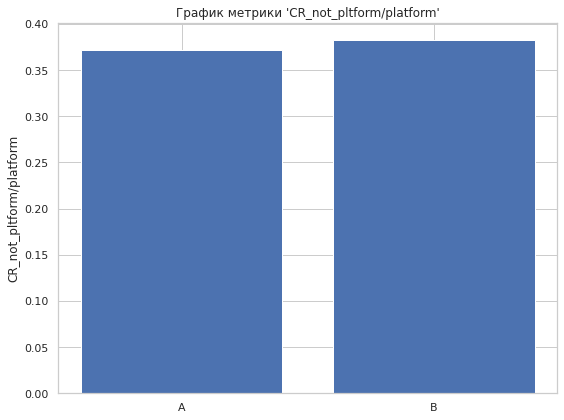

In [133]:
plot_metrics(df_CR[['grp', 'members', 'ARPPU', 'ARPU', 'CR', 'CR_from_platform', 'CR_not_platform', 'CR_not_pltform/platform']])

In [134]:
# Задание Выполнено